In [6]:
import numpy as np
import pylab as pl
import pickle as pkl
import os
import sys
import glob

# checking env variables are declared
try:
    os.environ['SESNPATH']
    os.environ['SESNCFAlib']

except KeyError:
    print ("must set environmental variable SESNPATH and SESNCfAlib")
    sys.exit()
# loading SESNCFA library
cmd_folder = os.getenv("SESNCFAlib")
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)
cmd_folder = os.getenv("SESNCFAlib"+"/templates")
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)

from snclasses import *
from templutils import *
import snclasses as snc
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/somayeh/.local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
#templates (like we did for spectra):

#93J for IIb

#94I for Ic (other people have already shown that it's very fast)

#98bw for Ic-bl (ie the general assumption for SN-GRB people)
sn93J = snc.mysn('93j', addlit=False, quiet=True)
lc, mag, dmag, snname = sn93J.loadsn('../literaturedata/phot/slc.sn93J.f', fnir = True, 
                                     verbose=False)
input_file, snn = sn93J.readinfofileall( verbose=False,
                                                                  earliest=False,
                                                                  loose=True,
                                                                  quiet=True)


sn93J.setsn(sn93J.metadata['Type'], sn93J.Vmax)
sn93J.setphot()
sn93J.getphot()
sn93J.setphase()
sn93J.sortlc()

sn94I = snc.mysn('94I', addlit=False, quiet=True)
lc, mag, dmag, snname = sn94I.loadsn('../literaturedata/phot/slc.sn94I.f', fnir = True, 
                                     verbose=False)
input_file, snn = sn94I.readinfofileall( verbose=False, earliest=False,
                                        loose=True, quiet=True)


sn94I.setsn(sn94I.metadata['Type'], sn94I.Vmax)
sn94I.setphot()
sn94I.getphot()
sn94I.setphase()
sn94I.sortlc()



sn98bw = snc.mysn('sn1998bw', addlit=False, quiet=True)
lc, mag, dmag, snname = sn98bw.loadsn('../literaturedata/phot/slc.sn98bw.f', fnir = True, 
                                     verbose=False)
sn98bw.readinfofileall( verbose=False, earliest=False,
                                        loose=True, quiet=True)

print (sn98bw.metadata['Type'])
sn98bw.setsn(sn98bw.metadata['Type'], sn98bw.Vmax)
sn98bw.setphot()
sn98bw.getphot()
sn98bw.setphase()
sn98bw.sortlc()



name, shortname sn1993j 93j
reading small file
SNname {38: 'sn1993J'}
Type {38: 'IIb'}
source {38: nan}
E(B-V) SF2011 {38: '0.069'}
finalmaxVjd {38: '2449095.23'}
finalmaxVjderr {38: 0.04}
CfA VJD bootstrap {38: '2449095.24'}
CfA VJD bootstrap error {38: '0.02'}
CfA BJD bootstrap {38: '<0000000'}
CfA BJD error {38: '<0000000'}
CfA RJD bootstrap {38: '<0000000'}
CfA RJD error {38: '<0000000'}
CfA IJD bootstrap {38: '<0000000'}
CfA IJD error {38: '<0000000'}
D11Vmaxdate {38: nan}
D11Vmaxdateerr {38: nan}
MaxVdate {38: '19930417.5'}
MaxVJD {38: '2449095'}
Vmax_CfAmethod {38: nan}
Vmax_CfAmethod_err {38: nan}
MaxVMag {38: '10.8'}
MaxVmagerr {38: nan}
luminosity distance Mpc {38: 2.6}
comment {38: 'date of exp1993/03/27.5 (JD2,449,074) : ONLY VERY VERY LATE time spec'}
U
u
B
V
R
I
g
r
i
J
H
K
w1
w2
m2
name, shortname sn1994I 94I
reading small file
SNname {39: 'sn1994I'}
Type {39: 'Ic'}
source {39: nan}
E(B-V) SF2011 {39: '0.0302'}
finalmaxVjd {39: '2449451.9'}
finalmaxVjderr {39: 0.04}
CfA 

In [8]:
allpickles = glob.glob("Ib*pkl")
su = setupvars()

print (su.bands)
#pkl.load("Ib")
SNtypes = ['IIb', 'Ib', 'Ic', 'Ic-bl', 'Ib-n']
print (SNtypes)

['U', 'u', 'B', 'V', 'R', 'I', 'g', 'r', 'i', 'J', 'H', 'K', 'w1', 'w2', 'm2']
['IIb', 'Ib', 'Ic', 'Ic-bl', 'Ib-n']


In [9]:

def plotlc(snts, sn=None):
    colors={'Ib':'SteelBlue', 
            'IIb':'DarkOrange', 
            'Ic':'IndianRed', 
            'Ic-bl':'Olive', 
            'Ib-n':'purple'}
    fig = pl.figure(figsize = (20,10))
    ax = []
    bands = su.bands
    if not sn is None: 
        bands = ['U', 'B', 'V', 'R', 'I']
    for i, b in enumerate(bands):
        if b == 'U': 
            continue
        ax.append(fig.add_subplot(3,5,i))
        pl.grid('off')
        ax[i-1].axis('off')
        y0 = 100
        y1 = -100
        for j, snt in enumerate(snts):
            if b in sntemplate[snt]:
                ax[i-1].fill_between(sntemplate[snt][b]['phase'], 
                            sntemplate[snt][b]['lcSmooth'] - sntemplate[snt][b]['lcstd'],
                            sntemplate[snt][b]['lcSmooth'] + sntemplate[snt][b]['lcstd'],
                                    alpha = 0.5, color=colors[snt])      
                ax[i-1].plot(sntemplate[snt][b]['phase'], sntemplate[snt][b]['lcSmooth'], 'k-')
                if not sn is None and sn.filters[b]>0:
                    magoffset = sn.getepochmags(b, phase=0)[1]
                    if not isinstance(magoffset, float32) and len(magoffset)<1 : magoffset = min(sn.photometry[b]['mag'])
                    ax[i-1].errorbar(sn.photometry[b]['phase'],
                                 sn.photometry[b]['mag'] -  magoffset, 
                                 yerr=sn.photometry[b]['dmag'] )
                y0 = min(min((sntemplate[snt][b]['lcSmooth'] - sntemplate[snt][b]['lcstd'])
                         [(sntemplate[snt][b]['phase']<40) * 
                          (sntemplate[snt][b]['phase']>-15)]), y0)
                y1 = max(max((sntemplate[snt][b]['lcSmooth'] + sntemplate[snt][b]['lcstd'])
                         [(sntemplate[snt][b]['phase']<40) * 
                          (sntemplate[snt][b]['phase']>-15)]), y1)
                ax[i-1].set_ylim(4, -1)#y1+0.2, y0-0.2)
                ax[i-1].set_xlim(-15,40)
                if j == 0:
                    ax[i-1].text(0, (pl.ylim()[0] + (pl.ylim()[1] - pl.ylim()[0])*0.5), 
                             b, fontsize=20)
                    print ("here",  [y1, y0])
                    ax[i-1].plot([0, 0], [-1,4], 'k-', alpha=0.2)
                #print (0, y1 , y0, snt, b, sntemplate[snt][b].keys())
    if sn is None:
        for k in [0,5,10]:
            ax[k].set_xlim(-15,40)
            ax[k].text(-30,-1,"m=-1.0", fontsize=20)
            ax[k].text(-30,3.5,"m=3.5", fontsize=20)

In [10]:
sntemplate = {}
for snt in SNtypes:
    sntemplate[snt] = {}
    for b in su.bands:

        if b in ['i', 'r', 'u']:
            bname = b + 'p'
        else:
            bname = b
        try:
            #print (glob.glob("georgetemplates/" + snt + "_" + bname + "_templatelcv_gp.pkl"),
            #      
            #      os.path.isfile("georgetemplates/" + snt + "_" + bname + "_templatelcv_gp.pkl"))
            if os.path.isfile("georgetemplates/" + snt + "_" + bname + "_templatelcv_gp.pkl") and\
                not ((b == 'B' or b == 'I') and snt == 'Ib') and not \
                ((b == 'i' or b == 'I' or b == 'r' or b == 'B' ) and snt == 'Ic-bl')  and not \
                (snt == 'Ic'):
                    #((b == 'u' or b == 'r') and snt == 'Ic'):
                
                    sntemplate[snt][b] = pkl.load(open("georgetemplates/" + 
                                                         snt + "_" + bname + 
                                                    "_templatelcv_gp.pkl", "rb"))
                #print ("here")
            else: 
                sntemplate[snt][b] = pkl.load(open(glob.glob("savedtemplates1126/" 
                                                             + snt + "_" + bname + 
                                                    "_templatelcv*pkl")[0], "rb"))
            tmp = pkl.load(open(glob.glob("savedtemplates1126/" + snt + "_" + bname + 
                                                    "_templatelcv*pkl")[0], "rb"))
            #print (tmp["phase"], sntemplate[snt][b]["phase"])
            for f in tmp["phase"]:
                if f in sntemplate[snt][b]['phase'] :
                    sntemplate[snt][b]['lcstd'][sntemplate[snt][b]["phase"]==f] = \
                    tmp['lcstd'][tmp["phase"]==f]
        except IndexError:
            print (snt, b, glob.glob(snt + "_" + bname + "_templatelcv*pkl"))


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc0 in position 7: ordinal not in range(128)

('here', [2.4458450761561177, -0.074547877525120154])
('here', [1.998033150260162, 0.026576643950414404])
('here', [1.5169036932601432, 0.0036430152590710765])
('here', [1.5812148922913929, -0.0024161377440245317])


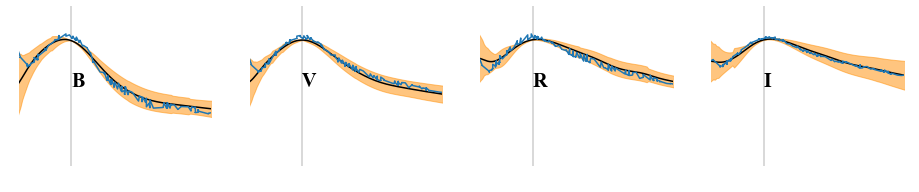

In [202]:
plotlc(['IIb'], sn=sn93J)


('here', [2.7198403098511079, -0.35948469366514335])
('here', [2.4605252647042821, -1.001146381380196])
('here', [2.2056627256141512, -0.16681961422569086])
('here', [1.9532805269351403, -0.066304439522283515])


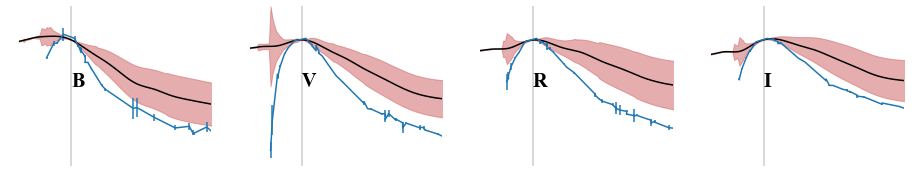

In [203]:
plotlc(['Ic'], sn=sn94I)


('here', [masked, masked])
('here', [masked, masked])
('here', [masked, masked])
('here', [1.8531756994674753, -0.51115894249769012])


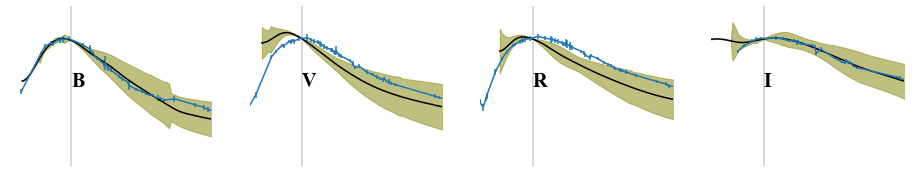

In [204]:
plotlc(['Ic-bl'], sn=sn98bw)


('here', [11.519687539691105, -1.1670002044438512])
('here', [2.6319037618736529, -0.17095831048599405])
('here', [masked, masked])
('here', [masked, masked])
('here', [1.670821478770576, -0.053083890242576093])
('here', [1.6001823344565975, -0.021834536074160089])
('here', [1.4653590667027165, 0.014571246734405418])
('here', [1.658596344223789, -0.097538019328289205])
('here', [1.206355984214488, -0.17552395606047527])
('here', [1.3558177556651521, -0.25606140795282817])
('here', [masked, masked])
('here', [masked, masked])
('here', [masked, masked])


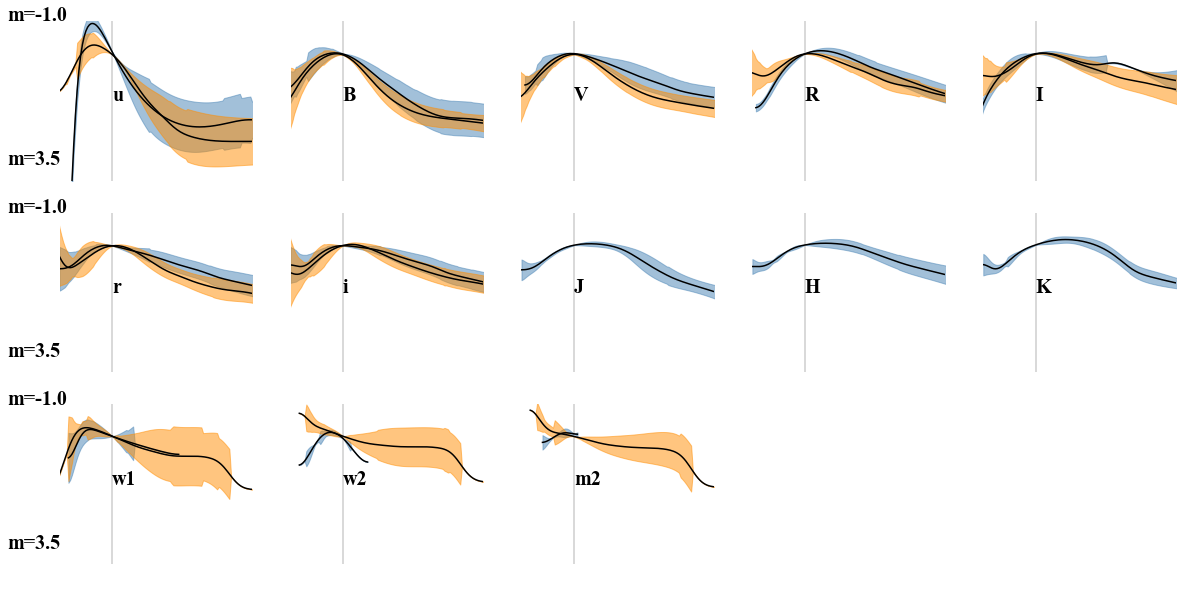

In [205]:
plotlc(['Ib', 'IIb'])


('here', [11.519687539691105, -1.1670002044438512])
('here', [2.6319037618736529, -0.17095831048599405])
('here', [masked, masked])
('here', [masked, masked])
('here', [1.670821478770576, -0.053083890242576093])
('here', [1.6001823344565975, -0.021834536074160089])
('here', [1.4653590667027165, 0.014571246734405418])
('here', [1.658596344223789, -0.097538019328289205])
('here', [1.206355984214488, -0.17552395606047527])
('here', [1.3558177556651521, -0.25606140795282817])
('here', [masked, masked])
('here', [masked, masked])
('here', [masked, masked])


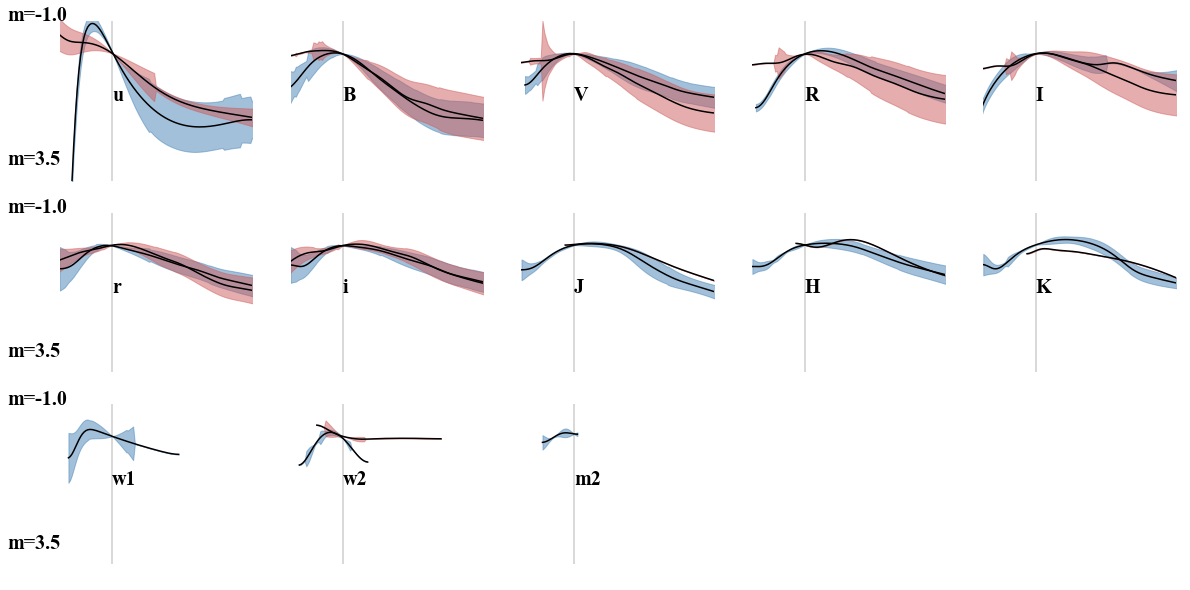

In [207]:
plotlc(['Ib', 'Ic'])

('here', [masked, masked])
('here', [masked, masked])
('here', [masked, masked])
('here', [1.8531756994674753, -0.51115894249769012])


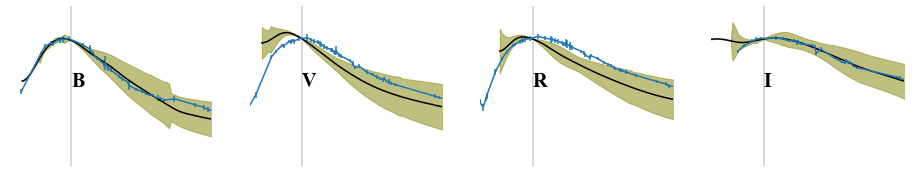

In [208]:

plotlc(['Ic-bl'], sn=sn98bw)


In [209]:
sn98bw.type
#sn98bw.plotsn(photometry=True)

'Ic-bl'

('here', [11.519687539691105, -1.1670002044438512])
('here', [2.6319037618736529, -0.17095831048599405])
('here', [masked, masked])
('here', [masked, masked])
('here', [1.670821478770576, -0.053083890242576093])
('here', [1.6001823344565975, -0.021834536074160089])
('here', [1.4653590667027165, 0.014571246734405418])
('here', [1.658596344223789, -0.097538019328289205])
('here', [1.206355984214488, -0.17552395606047527])
('here', [1.3558177556651521, -0.25606140795282817])
('here', [masked, masked])
('here', [masked, masked])
('here', [masked, masked])


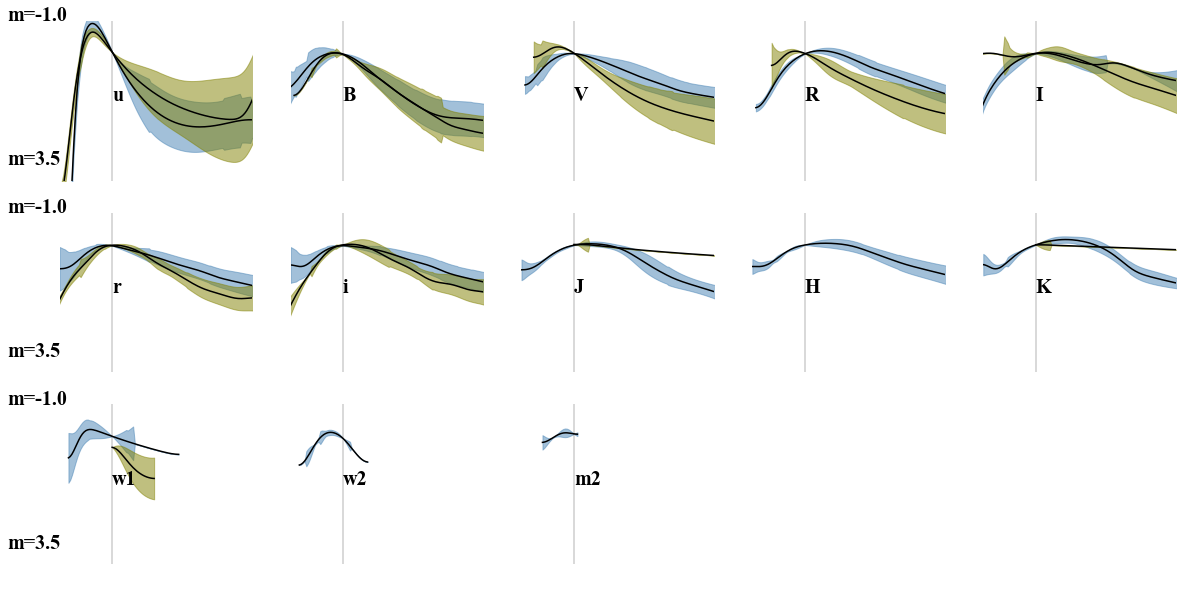

In [210]:
plotlc(['Ib', 'Ic-bl'])

('here', [3.8872742445378687, -0.29347713894826311])
('here', [2.6319037618736529, -0.17095831048599405])
('here', [masked, masked])
('here', [masked, masked])
('here', [1.670821478770576, -0.053083890242576093])
('here', [1.6001823344565975, -0.021834536074160089])
('here', [1.4653590667027165, 0.014571246734405418])
('here', [1.658596344223789, -0.097538019328289205])
('here', [1.206355984214488, -0.17552395606047527])
('here', [1.3558177556651521, -0.25606140795282817])
('here', [masked, masked])
('here', [masked, masked])
('here', [masked, masked])


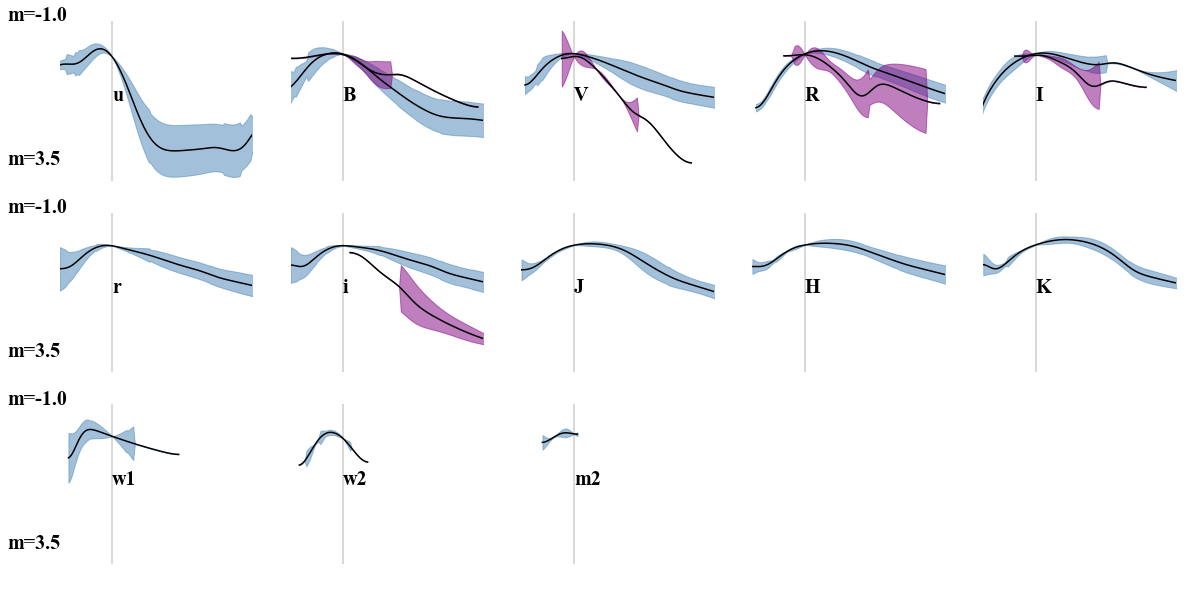

In [200]:
plotlc(['Ib', 'Ib-n'])

In [161]:
print np.array(pl.rcParams.keys())[np.array(['col' in k for k in np.array(pl.rcParams.keys())])]


[u'axes.edgecolor' u'axes.facecolor' u'axes.labelcolor'
 u'boxplot.boxprops.color' u'boxplot.capprops.color'
 u'boxplot.flierprops.color' u'boxplot.flierprops.markeredgecolor'
 u'boxplot.flierprops.markerfacecolor' u'boxplot.meanprops.color'
 u'boxplot.meanprops.markeredgecolor' u'boxplot.meanprops.markerfacecolor'
 u'boxplot.medianprops.color' u'boxplot.whiskerprops.color'
 u'figure.edgecolor' u'figure.facecolor' u'grid.color'
 u'legend.columnspacing' u'legend.edgecolor' u'legend.facecolor'
 u'lines.color' u'patch.edgecolor' u'patch.facecolor'
 u'patch.force_edgecolor' u'pdf.inheritcolor' u'savefig.edgecolor'
 u'savefig.facecolor' u'text.color' u'xtick.color' u'ytick.color']
